In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from sklearn.metrics import confusion_matrix
from torch.optim import Adam
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
transform=transforms.ToTensor()

In [4]:
train_data=datasets.MNIST(root="../Data",train=True,download=True,transform=transform)
test_data=datasets.MNIST(root="../Data",train=False,download=True,transform=transform)

C:\Users\Rohit K Rajgarhia\anaconda\envs\pytorchenv\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [5]:
print(train_data[0])

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

In [6]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: ../Data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [7]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: ../Data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [8]:
image, label=train_data[0]

In [9]:
image.shape

torch.Size([1, 28, 28])

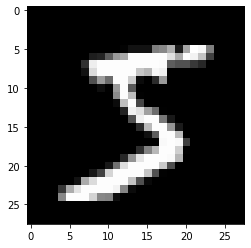

In [10]:
plt.imshow(image.reshape((28,28)),cmap='gray')

In [11]:
torch.manual_seed(101)
trainloader=DataLoader(train_data,batch_size=100,shuffle=True)
testloader=DataLoader(test_data,batch_size=500,shuffle=False)

In [12]:
#get first batch
for images,labels in trainloader:
    break

In [13]:
images.shape

torch.Size([100, 1, 28, 28])

In [14]:
print("Labels: ",labels[:12].numpy())

Labels:  [7 2 3 5 8 5 3 6 9 9 1 3]


torch.Size([3, 32, 362])
Labels:  [7 2 3 5 8 5 3 6 9 9 1 3]


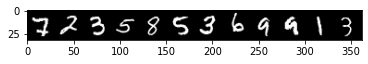

In [15]:
from torchvision.utils import make_grid
im=make_grid(images[:12],nrow=12)
print(im.shape)
plt.imshow(np.transpose(im.numpy(),(1,2,0)))
print("Labels: ",labels[:12].numpy())

In [23]:
class MultiLayerPerceptron(nn.Module):
    def __init__(self,in_sz=784,out_sz=10,layers=[120,84]):
        super().__init__()
        self.fc1=nn.Linear(in_sz,layers[0])
        self.fc2=nn.Linear(layers[0],layers[1])
        self.fc3=nn.Linear(layers[1],out_sz)
    def forward(self,X):
        X=F.relu(self.fc1(X))
        X=F.relu(self.fc2(X))
        X=self.fc3(X)
        return F.log_softmax(X,dim=1)

In [24]:
torch.manual_seed(101)
model=MultiLayerPerceptron()
model

MultiLayerPerceptron(
  (fc1): Linear(in_features=784, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [25]:
for param in model.parameters():
    print(param.numel())

94080
120
10080
84
840
10


In [26]:
criterion=nn.CrossEntropyLoss()
optimizer=Adam(model.parameters(),lr=0.001)

In [27]:
print(images.shape)
images.view(100,-1).shape

torch.Size([100, 1, 28, 28])


torch.Size([100, 784])

In [28]:
import time
start_time=time.time()
# Training
epochs = 10

# Trackers
train_loss=[]
test_loss=[]
train_correct=[]
test_correct=[]

for i in range(epochs):
    trn_corr=0
    tst_corr=0
    for b, (X_train,y_train) in enumerate(trainloader):
        b+=1
        y_pred=model(X_train.view(100,-1))
        loss=criterion(y_pred,y_train)
        predicted = torch.max(y_pred.data,1)[1]
        trn_corr+= (predicted ==  y_train).sum()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        accuracy= (trn_corr)*100/(100*b)
        if(b%200==0):
            print(f'epoch: {i+1}  bath: {b}  loss= {loss.item()} accuracy: {accuracy}')
    train_loss.append(loss.item())
    train_correct.append(trn_corr)
    
    with torch.no_grad():
        for b, (X_test,y_test) in enumerate (testloader):
            b+=1
            y_val=model(X_test.view(500,-1))
            loss=criterion(y_val,y_test)
            predicted = torch.max(y_val.data,1)[1]
            tst_corr += (predicted == y_test).sum()
    loss=criterion(y_val,y_test)
    test_loss.append(loss)
    test_correct.append(tst_corr)            
        


total_time=time.time()-start_time
print(f'Duration : {total_time/60} mins')

epoch: 1  bath: 200  loss= 0.2356238216161728 accuracy: 83.24500274658203
epoch: 1  bath: 400  loss= 0.3533070683479309 accuracy: 87.53250122070312
epoch: 1  bath: 600  loss= 0.13734400272369385 accuracy: 89.5816650390625
epoch: 2  bath: 200  loss= 0.24684995412826538 accuracy: 94.87000274658203
epoch: 2  bath: 400  loss= 0.14273887872695923 accuracy: 95.08499908447266
epoch: 2  bath: 600  loss= 0.0733654797077179 accuracy: 95.3550033569336
epoch: 3  bath: 200  loss= 0.08371470123529434 accuracy: 96.51499938964844
epoch: 3  bath: 400  loss= 0.06228962913155556 accuracy: 96.61250305175781
epoch: 3  bath: 600  loss= 0.06475143879652023 accuracy: 96.70500183105469
epoch: 4  bath: 200  loss= 0.117899090051651 accuracy: 97.6500015258789
epoch: 4  bath: 400  loss= 0.05712112784385681 accuracy: 97.47750091552734
epoch: 4  bath: 600  loss= 0.031934332102537155 accuracy: 97.48833465576172
epoch: 5  bath: 200  loss= 0.10764962434768677 accuracy: 98.08999633789062
epoch: 5  bath: 400  loss= 0.045

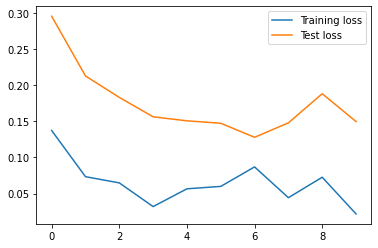

In [30]:
plt.plot(train_loss,label="Training loss")
plt.plot(test_loss,label="Test loss")
plt.legend()

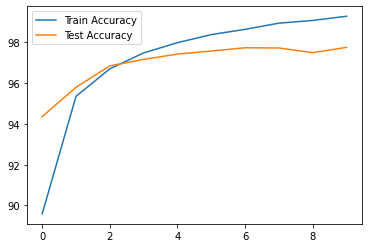

In [36]:
plt.plot(np.array(train_correct)/600,label="Train Accuracy")
plt.plot(np.array(test_correct)/100,label="Test Accuracy")
plt.legend()

In [41]:
#Test accuracy on whole unseen test data

test_loader=DataLoader(test_data,batch_size=10000,shuffle=False)
with torch.no_grad():
    for xtest, ytest in test_loader:
        pred=model(xtest.view(len(xtest),-1))
        out=torch.max(pred.data,1)[1]
        corr=(out==ytest).sum()
print("Accuracy on whole test dataset is", corr/100)

Accuracy on whole test dataset is tensor(97.7600)
